In [27]:
import math
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
official = pd.read_csv("Official.csv", sep=",", encoding='cp1252')
WithSources = pd.read_csv("WithSources.csv")

In [29]:
races = ["Black", "White", "Latino", "Asian", "Other"]
news_percent = [0 for i in range(len(races))]
official_percent = [0 for i in range(len(races))]

0.31716417910447764
0.5485074626865671
0.026119402985074626
0.08955223880597014
0.018656716417910446


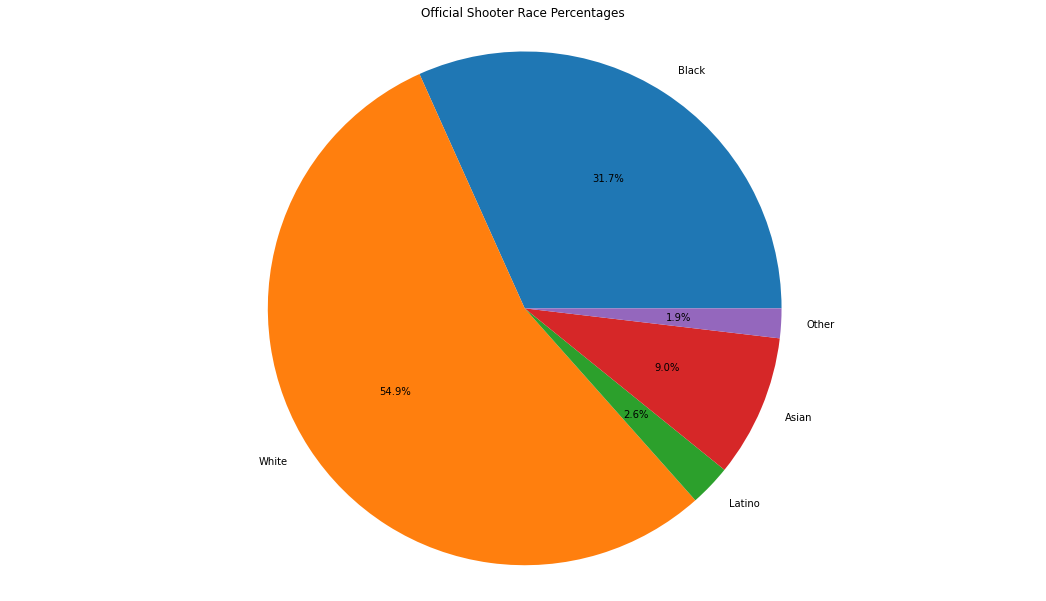

In [30]:
sum = 0
for i in range(len(official)):
    race = official.iloc[i]["Race"]
    if type(race) is float:
        continue
    race = race.split()[0]

    for j in range(len(races)):
        if races[j] == race:
            sum += 1
            official_percent[j] += 1

for i in range(len(official_percent)):
    official_percent[i] /= sum
    print(official_percent[i])

plt.pie(official_percent, labels=races, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Official Shooter Race Percentages")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

0.19672131147540983
0.4262295081967213
0.16393442622950818
0.13114754098360656
0.08196721311475409


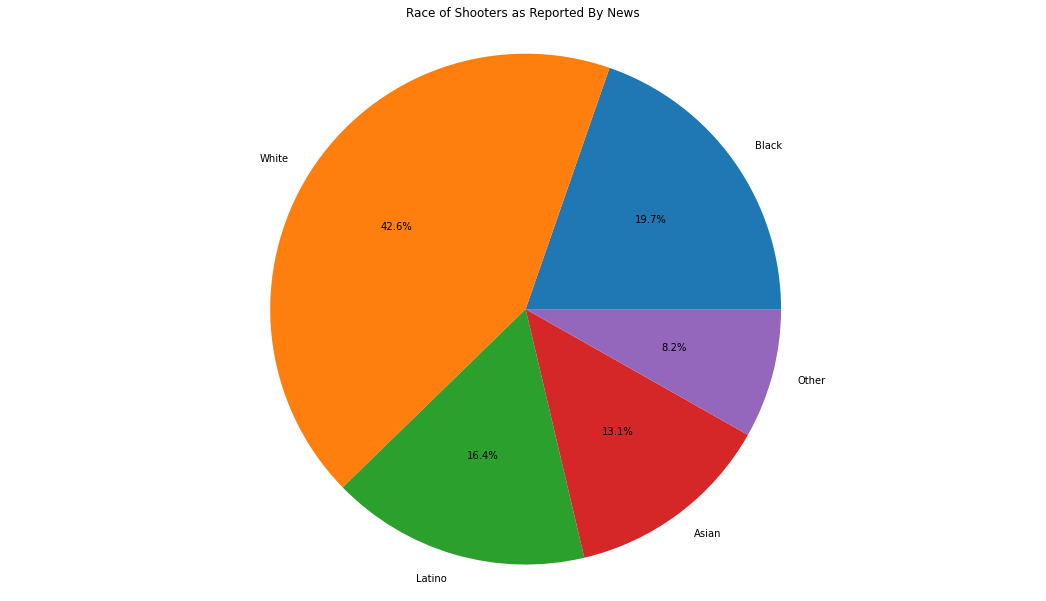

In [31]:
sum = 0
for i in range(len(WithSources)):
    race = WithSources.iloc[i]["race"]
    if type(race) is float:
        continue
    race = race.split()[0]

    for j in range(len(races)):
        if races[j] == race:
            sum += 1
            news_percent[j] += 1

for i in range(len(news_percent)):
    news_percent[i] /= sum
    print(news_percent[i])

plt.pie(news_percent, labels=races, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Race of Shooters as Reported By News")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

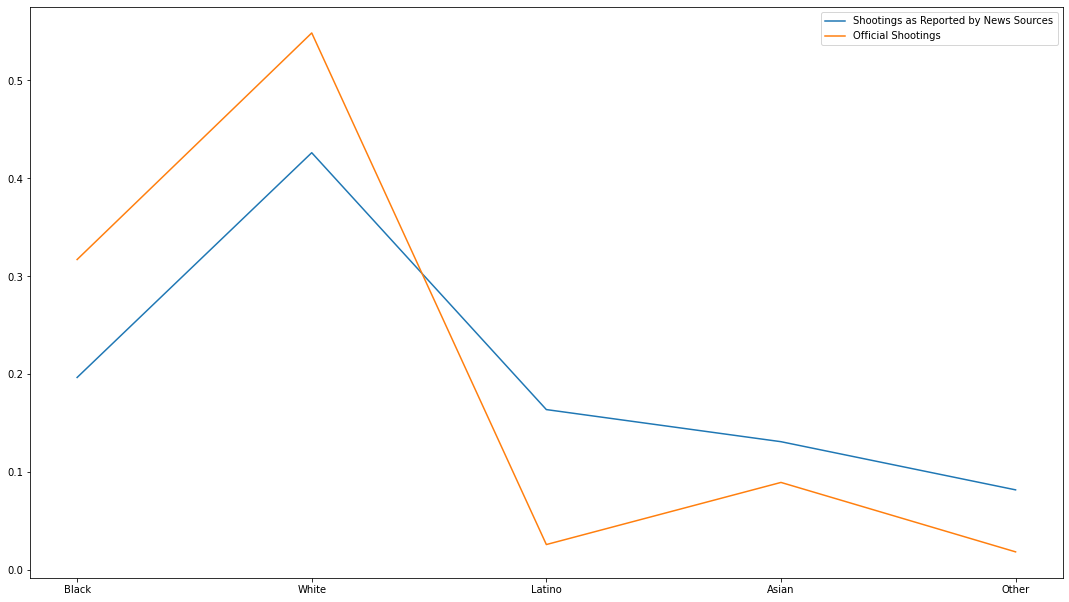

In [36]:
plt.plot(races, news_percent, label="Shootings as Reported by News Sources")
plt.plot(races, official_percent, label="Official Shootings")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [37]:
print(news_percent)
print(official_percent)

#Let's perform a chi-squared test

#Null Hypothesis: There is no significant statistical difference between observed(shootings as displayed on news) and expected(official shootings) values.

#First, we use the standard d = 0.05 critical value to ensure that we are 95% sure that we are either accepting or rejecting our null hypothesis

degFree = len(races)
print("Degrees of Freedom: " + str(degFree))
#Next, notice that we have 5 categories in races, so 5 - 1 = 4 degrees of freedom

#Third, in order to make our results accurate we scale values from both datasets down to the size of the smaller dataset
print("The size of the smaller dataset is: " + str(len(WithSources)))

#temporary arrays so we don't modify the actual arrays
np = []
op = []
for i in range(len(races)):
    np.append(news_percent[i]*len(WithSources))
    op.append(official_percent[i]*len(WithSources))

#Now we perform the chi squared analysis:
X = 0
for i in range(len(races)):
    O = np[i]
    E = op[i]
    #cur is the value for each category
    #cur = (O - E)*(O - E) / E
    cur = abs(O - E) / math.sqrt(E)
    print(O)
    print(E)
    print("Current value: " + str(cur))
    #We find the summation of this, and store it in X
    X += cur

#Looking at the chi squared chart, we have 9.488 as our expected critical value
print("Our expected critical value is 9.488, according to the Chi-Squared Chart")
#Now, let's see if our result, X, exceeds that value
print("X = " + str(X))
#Since X > 9.488, we rejected our null hypothesis
print("Null hypothesis Rejected")
print("There is significant statistical difference between observed(shootings as displayed on news) and expected(official shootings) values.")
print("This means that there is indeed a discrepancy between the shootings by race as displayed by news sources, versus the actual shootings themselves")

[0.19672131147540983, 0.4262295081967213, 0.16393442622950818, 0.13114754098360656, 0.08196721311475409]
[0.31716417910447764, 0.5485074626865671, 0.026119402985074626, 0.08955223880597014, 0.018656716417910446]
Degrees of Freedom: 5
The size of the smaller dataset is: 124
24.39344262295082
39.32835820895523
Current value: 2.3814960407809
52.85245901639344
68.01492537313433
Current value: 1.8385173697256072
20.327868852459016
3.2388059701492535
Current value: 9.495673694283072
16.262295081967213
11.104477611940299
Current value: 1.5478073420310707
10.163934426229508
2.3134328358208953
Current value: 5.1614171221124705
Our expected critical value is 9.488, according to the Chi-Squared Chart
X = 20.42491156893312
Null hypothesis Rejected
There is significant statistical difference between observed(shootings as displayed on news) and expected(official shootings) values.
This means that there is indeed a discrepancy between the shootings by race as displayed by news sources, versus the act

In [38]:
#Basically, the standard deviation of residues(difference between observed and expected)
#REMOVE LATER: https://www.youtube.com/watch?v=hSP_rmNHU_U

#We have sqrt(summation of residues) / N-2
SRME = 0
for i in range(len(races)):
    SRME += (np[i] - op[i])*(np[i] - op[i])

SRME /= len(races) - 2
SRME = math.sqrt(SRME)
#Now we print the SRME
print("This is the Square Root Mean Error that we find " + str(X))

This is the Square Root Mean Error that we find 20.42491156893312
